In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

In [2]:
#display options
pd.options.display.float_format = '{:.3f}'.format

In [3]:
df_books = pd.read_csv('books.csv')
df_books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,34523,The Flying Sorcerers: More Comic Tales of Fantasy,Peter Haining-Roald Dahl-Terry Pratchett-Angel...,3.980,1857237250,9781860000000.000,eng,383,2197,17
1,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,3.600,1593600119,9781590000000.000,eng,400,25,4
2,22128,Patriots (The Coming Collapse),James Wesley,3.630,156384155X,9781560000000.000,eng,342,38,4
3,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,0.000,851742718,9780850000000.000,eng,49,0,0
4,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.560,439785960,9780440000000.000,eng,652,1944099,26249


In [4]:
df_books.describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13719.000,13719.000,13719.000,13719.000,13719.000,13719.000
mean,22160.579,3.930,9764023551061.795,342.381,17759.091,533.440
std,13699.603,0.359,398695406633.363,252.619,112937.122,2528.566
min,1.000,0.000,8987059752.000,0.000,0.000,0.000
25%,10621.000,3.770,9780350000000.000,196.000,82.500,7.000
50%,21322.000,3.960,9780610000000.000,301.000,630.000,40.000
75%,33322.000,4.130,9780940000000.000,421.000,4737.000,222.000
max,47709.000,5.000,9790010000000.000,6576.000,5629932.000,93619.000


In [6]:
df_books[df_books['ratings_count'] == 0].count() / len(df_books) * 100

bookID               0.838
title                0.838
authors              0.838
average_rating       0.838
isbn                 0.838
isbn13               0.838
language_code        0.838
# num_pages          0.838
ratings_count        0.838
text_reviews_count   0.838
dtype: float64

Some of our dataset has 0 ratings. Let's drop those!

In [8]:
df = df_books.loc[df_books.ratings_count > 0]
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,34523,The Flying Sorcerers: More Comic Tales of Fantasy,Peter Haining-Roald Dahl-Terry Pratchett-Angel...,3.980,1857237250,9781860000000.000,eng,383,2197,17
1,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,3.600,1593600119,9781590000000.000,eng,400,25,4
2,22128,Patriots (The Coming Collapse),James Wesley,3.630,156384155X,9781560000000.000,eng,342,38,4
4,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.560,439785960,9780440000000.000,eng,652,1944099,26249
5,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.490,439358078,9780440000000.000,eng,870,1996446,27613


In [10]:
df = df.rename(columns={'# num_pages' : 'num_pages'})

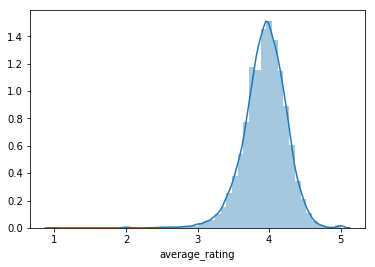

In [12]:
sns.distplot(df.average_rating)
plt.show()

In [14]:
print(df.average_rating.mean(), df.average_rating.std())

3.940711555424852 0.29767956429376663


In [15]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,13604.000,13604.000,13604.000,13604.000,13604.000,13604.000
mean,22139.232,3.941,9763870103426.695,342.980,17909.216,537.949
std,13694.647,0.298,400373556612.290,252.630,113401.649,2538.754
min,1.000,1.000,8987059752.000,0.000,1.000,0.000
25%,10610.000,3.770,9780350000000.000,197.000,88.000,8.000
50%,21282.500,3.960,9780600000000.000,302.000,650.000,41.000
75%,33279.750,4.130,9780940000000.000,421.250,4802.750,225.000
max,47709.000,5.000,9790010000000.000,6576.000,5629932.000,93619.000


In [16]:
df.isnull().sum() / df.isnull().count() * 100

bookID               0.000
title                0.000
authors              0.000
average_rating       0.000
isbn                 0.000
isbn13               0.000
language_code        0.000
num_pages            0.000
ratings_count        0.000
text_reviews_count   0.000
dtype: float64

No missing values!

A good book should have an average_rating of at least 4.4 --- arbitrarily set of course :) This is for practice people!

In [17]:
df['is_good'] = df['average_rating'].apply(lambda x: 1 if x >= 4.4 else 0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
X = df[['average_rating', 'num_pages']]
Y = df.is_good
neighbors.fit(X,Y)

predictions = neighbors.predict(X)
print(neighbors.predict([[4.9, 300]]))
print(neighbors.predict_proba([[4.4, 300]]))

[0]
[[1. 0.]]


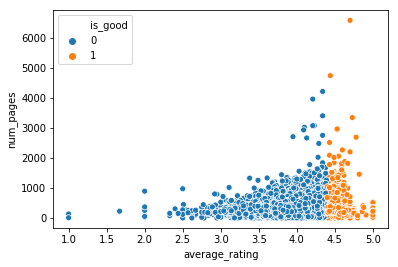

In [19]:
sns.scatterplot(x='average_rating', y='num_pages', data=df, hue='is_good')
plt.show()

In [26]:
(predictions == Y).sum() / len(Y) * 100

97.24345780652749

### Music Dataset

In [27]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


In [28]:
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X, Y)

print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]
